In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
import scipy.stats
cf.go_offline()
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
auto= pd.read_csv('Automobile price data _Raw_.csv')
auto.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


## Understanding The Data

In [3]:
auto.shape

(205, 26)

In [4]:
auto.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [5]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
auto.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.8,1.2,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.8,6.0,86.6,94.5,97.0,102.4,120.9
length,205.0,174.0,12.3,141.1,166.3,173.2,183.1,208.1
width,205.0,65.9,2.1,60.3,64.1,65.5,66.9,72.3
height,205.0,53.7,2.4,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.6,520.7,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.9,41.6,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.1,4.0,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.2,6.5,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.8,6.9,16.0,25.0,30.0,34.0,54.0


It shows there are no NaN values. But some columns which are supposed to be numerical are object type.
So there might be any charecters in such columns

In [7]:
auto.nunique()

symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mpg              29
highway-mpg           30
price                187
dtype: int64

## Data Cleaning

## Dealing with useless charecters

In [8]:
cols_list= [col for col in auto.columns]
for col in cols_list:
    auto[col]= auto[col].apply(lambda x:np.nan if x=='?' else x)
auto.head()   

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Every useless charecter has replaced with NaN values

In [9]:
auto.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

### Columns with Missing Values
  #### * normalized-losses- 41
  #### * num-of-doors - 2
  #### * bore- 4
  #### * stroke- 4
  #### * horsepower- 4
  #### * peak-rpm- 2
  #### * price- 4

### Converting mistyped dtypes into appropriate dtypes

In [10]:
for col in auto.select_dtypes(include='object'):
    try:
        auto[col]= auto[col].astype('str').astype('float64')
    except:
        pass

In [11]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Encoding Some object columns

In [12]:
print(auto['num-of-doors'].unique())
print(auto['num-of-cylinders'].unique())

['two' 'four' nan]
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [13]:
auto['num-of-doors']= auto['num-of-doors'].replace({'two':2, 'four':4})
auto['num-of-cylinders']= auto['num-of-cylinders'].replace({'four':4, 'six':6, 'five':5, 
                                                            'three':3, 'twelve':12, 'two':2, 'eight':8 })

In [14]:
auto.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.8,1.2,-2.0,0.0,1.0,2.0,3.0
normalized-losses,164.0,122.0,35.4,65.0,94.0,115.0,150.0,256.0
num-of-doors,203.0,3.1,1.0,2.0,2.0,4.0,4.0,4.0
wheel-base,205.0,98.8,6.0,86.6,94.5,97.0,102.4,120.9
length,205.0,174.0,12.3,141.1,166.3,173.2,183.1,208.1
width,205.0,65.9,2.1,60.3,64.1,65.5,66.9,72.3
height,205.0,53.7,2.4,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.6,520.7,1488.0,2145.0,2414.0,2935.0,4066.0
num-of-cylinders,205.0,4.4,1.1,2.0,4.0,4.0,4.0,12.0
engine-size,205.0,126.9,41.6,61.0,97.0,120.0,141.0,326.0


## Imputing the Missing Values

### Columns to be imputed
  #### * normalized-losses
  #### * num-of-doors 
  #### * bore
  #### * stroke
  #### * peak-rpm
  #### * price

(18.0, 0.0)

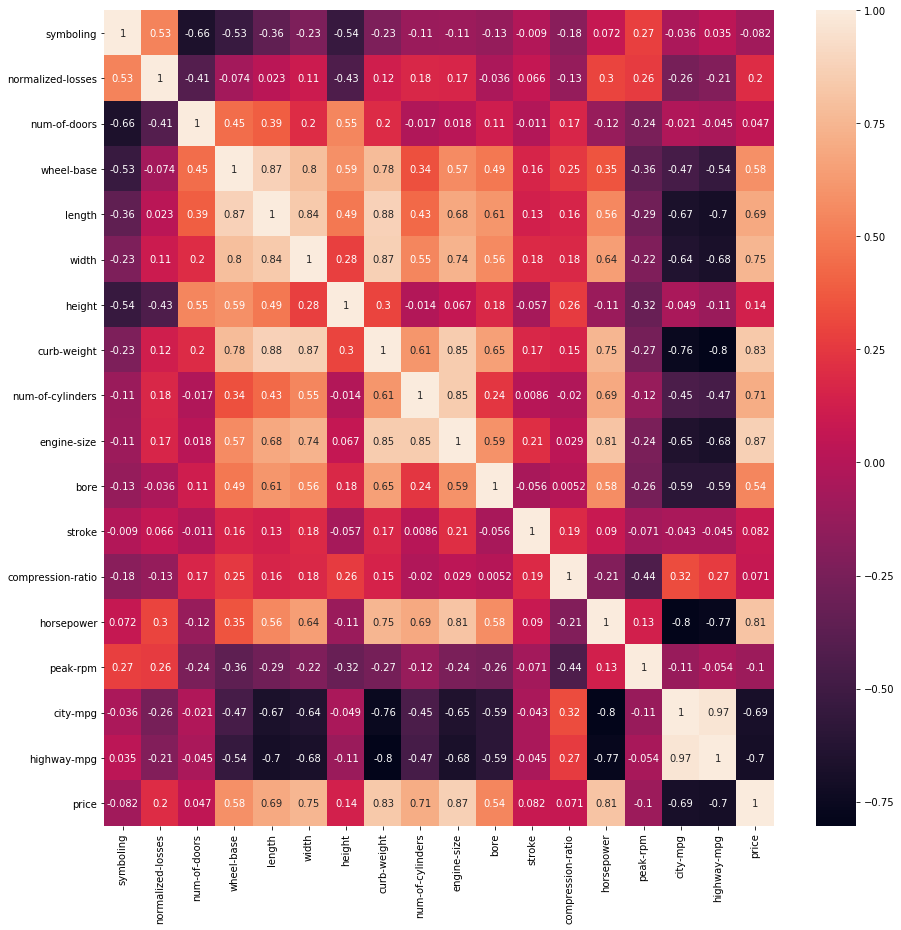

In [15]:
plt.figure(figsize=(15,15))
ax= sns.heatmap(auto.corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### 1) Imputing Normalized - losses column
##### relative average loss payment per insured vehicle year

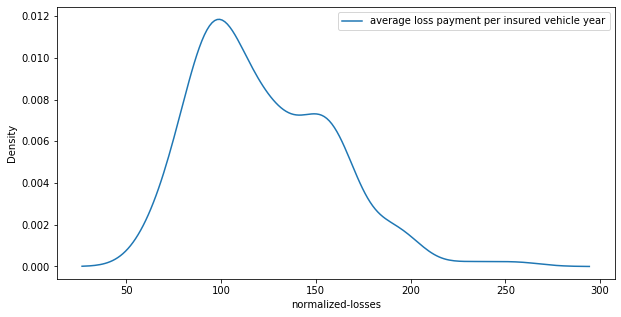

In [16]:
plt.figure(figsize=(10,5))
sns.kdeplot(auto['normalized-losses'])
plt.legend(['average loss payment per insured vehicle year'])

In [17]:
auto[auto['normalized-losses'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,NaN,audi,gas,std,2.0,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,5,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
7,1,NaN,audi,gas,std,4.0,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,5,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
9,0,NaN,audi,gas,turbo,2.0,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,5,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
14,1,NaN,bmw,gas,std,4.0,sedan,rwd,front,103.5,189.0,66.9,55.7,3055,ohc,6,164,mpfi,3.31,3.19,9.0,121.0,4250.0,20,25,24565.0
15,0,NaN,bmw,gas,std,4.0,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,6,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0
16,0,NaN,bmw,gas,std,2.0,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,6,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
17,0,NaN,bmw,gas,std,4.0,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,6,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

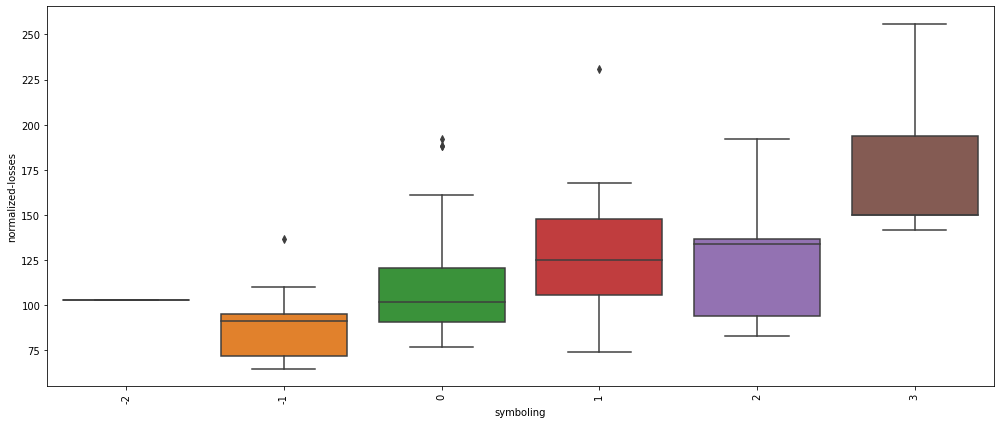

In [18]:
plt.figure(figsize=(14,6))
sns.boxplot(data=auto, x='symboling', y='normalized-losses')
plt.tight_layout()
plt.xticks(rotation=90)

#### It seems average loss payment per insured vehicle year is more denser b/w 90 and 110
#### The distibution of normalized losses in each class of risk factor of car is clearly shown by above plot

In [19]:
make_norm= pd.pivot_table(auto, index='symboling', values='normalized-losses', aggfunc=np.mean).round(1)
make_norm=make_norm.reset_index()
make_norm

,symboling,normalized-losses
0,-2,103.0
1,-1,85.6
2,0,113.2
3,1,128.6
4,2,125.7
5,3,168.6


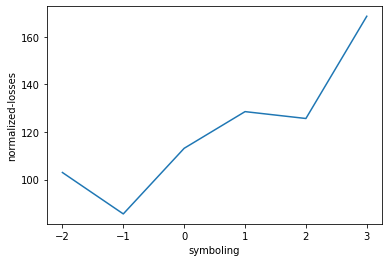

In [20]:
sns.lineplot(x='symboling', y='normalized-losses', data=auto)

In [21]:
def impute_norm_loss(col):
    normalized_losses= col[0]
    symboling= col[1]
    if pd.isnull(normalized_losses):
        if symboling== -2:
            return 103.0
        elif symboling== -1:
            return 85.6
        elif symboling== 0:
            return 113.2
        elif symboling== 1:
            return 128.6
        elif symboling== 2:
            return 125.7
        elif symboling== 3:
            return 168.6
    else:
        return normalized_losses

In [22]:
auto['normalized-losses']= auto[['normalized-losses','symboling']].apply(impute_norm_loss, axis=1)
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,168.6,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,168.6,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,128.6,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


normalized-losses column is imputed with symboling because it has a positive correlation (0.53) with normalized-losses

### 2) Imputing no.of doors column

### Analysing no. of doors with body style

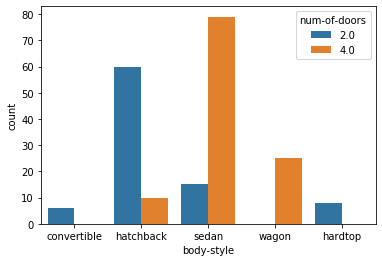

In [23]:
sns.countplot(x='body-style', data=auto, hue='num-of-doors')

#### We can hardly find convertible and hardtop cars with 4 doors
#### Sedan type are likely to have 4 no.of doors
#### Hatchback are likely to have 2 no.of doors

In [24]:
auto[auto['num-of-doors'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,4,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,113.2,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,4,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


##### Here cars with missing doors are sedan type. So we can impute them with 4 no.of doors

In [25]:
auto['num-of-doors'].fillna(4, inplace=True)

### 3) Imputing of Bore column

##### Bore is the diameter of the cylinder.
##### Engine displacement is calculated based on bore, stroke length and the number of cylinders

##### Bore is one of the dimension of cylinder, so lets analyse how Bore varies with Engine size


Text(0.5, 1.0, 'Bore vs Engine size')

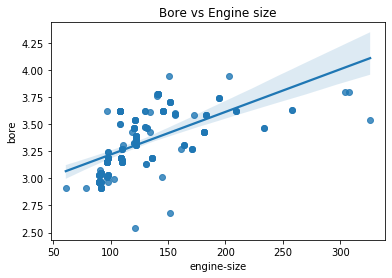

In [26]:
sns.regplot(x='engine-size', y='bore', data=auto,order=1)
plt.title('Bore vs Engine size')

##### There is a positive correlation blw Bore and Engine Size

In [27]:
auto[auto['bore'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,2,70,4bbl,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,2,80,mpfi,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


 #### 3 of them have engine size 70 and one have 80
 #### The above regression plot suggests that cars with engine size b/w 50 and 100 are more likely to have bore 2.8 to 3.0

In [28]:
auto['bore'].fillna(2.9, inplace=True)

### Imputing Stroke column
##### stroke is the distance within the cylinder the piston travels

#### Another dimension of cylinder

Text(0.5, 1.0, 'Stroke vs Engine size')

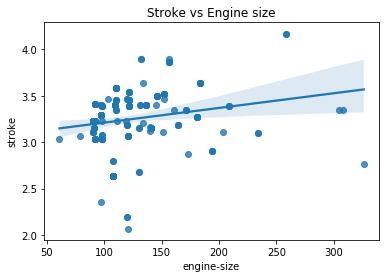

In [29]:
sns.regplot(x='engine-size', y='stroke', data=auto,order=1)
plt.title('Stroke vs Engine size')

#### Here we can see stroke seems to be concentrated at one point. Most of the cars are  likely to have stroke b/w 3 and 3.5

In [30]:
auto[auto['engine-size'].between(50,90)].sort_values(['engine-size'])

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
18,2,121.0,chevrolet,gas,std,2.0,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,3,61,2bbl,2.91,3.03,9.50,48.0,5100.0,47,53,5151.0
57,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,2,70,4bbl,2.90,NaN,9.40,101.0,6000.0,17,23,13645.0
56,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2,70,4bbl,2.90,NaN,9.40,101.0,6000.0,17,23,11845.0
55,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2,70,4bbl,2.90,NaN,9.40,101.0,6000.0,17,23,10945.0
32,1,101.0,honda,gas,std,2.0,hatchback,fwd,front,93.7,150.0,64.0,52.6,1837,ohc,4,79,1bbl,2.91,3.07,10.10,60.0,5500.0,38,42,5399.0
58,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,2,80,mpfi,2.90,NaN,9.40,135.0,6000.0,16,23,15645.0
24,1,148.0,dodge,gas,std,4.0,hatchback,fwd,front,93.7,157.3,63.8,50.6,1967,ohc,4,90,2bbl,2.97,3.23,9.40,68.0,5500.0,31,38,6229.0
25,1,148.0,dodge,gas,std,4.0,sedan,fwd,front,93.7,157.3,63.8,50.6,1989,ohc,4,90,2bbl,2.97,3.23,9.40,68.0,5500.0,31,38,6692.0
26,1,148.0,dodge,gas,std,4.0,sedan,fwd,front,93.7,157.3,63.8,50.6,1989,ohc,4,90,2bbl,2.97,3.23,9.40,68.0,5500.0,31,38,7609.0
120,1,154.0,plymouth,gas,std,4.0,hatchback,fwd,front,93.7,157.3,63.8,50.6,1967,ohc,4,90,2bbl,2.97,3.23,9.40,68.0,5500.0,31,38,6229.0


In [31]:
auto[auto['stroke'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2,70,4bbl,2.9,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2,70,4bbl,2.9,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2385,rotor,2,70,4bbl,2.9,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2500,rotor,2,80,mpfi,2.9,NaN,9.4,135.0,6000.0,16,23,15645.0


In [32]:
# Imputing stroke column with appropriate engine size
def impute_stroke(col):
    stroke= col[0]
    engine_size= col[1]
    if pd.isnull(stroke):
        if engine_size==70:
            return 3.05
        if engine_size==80:
            return 3.07
    else:
        return stroke
auto['stroke']= auto[['stroke','engine-size']].apply(impute_stroke, axis=1)

### Imputing Horsepower column

In [33]:
auto[auto['horsepower'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,113.2,renault,gas,std,4.0,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,4,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
131,2,125.7,renault,gas,std,2.0,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,4,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


In [34]:
auto[auto['price'].between(9200.0, 10000.0)].sort_values(['price'])

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
144,0,102.0,subaru,gas,std,4.0,sedan,4wd,front,97.0,172.0,65.4,54.3,2385,ohcf,4,108,2bbl,3.62,2.64,9.0,82.0,4800.0,24,25,9233.0
162,0,91.0,toyota,gas,std,4.0,sedan,fwd,front,95.7,166.3,64.4,52.8,2140,ohc,4,98,2bbl,3.19,3.03,9.0,70.0,4800.0,28,34,9258.0
87,1,125.0,mitsubishi,gas,turbo,4.0,sedan,fwd,front,96.3,172.4,65.4,51.6,2403,ohc,4,110,spdi,3.17,3.46,7.5,116.0,5500.0,23,30,9279.0
88,-1,137.0,mitsubishi,gas,std,4.0,sedan,fwd,front,96.3,172.4,65.4,51.6,2403,ohc,4,110,spdi,3.17,3.46,7.5,116.0,5500.0,23,30,9279.0
130,0,113.2,renault,gas,std,4.0,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,4,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9295.0
165,1,168.0,toyota,gas,std,2.0,sedan,rwd,front,94.5,168.7,64.0,52.6,2265,dohc,4,98,mpfi,3.24,3.08,9.4,112.0,6600.0,26,29,9298.0
187,2,94.0,volkswagen,diesel,turbo,4.0,sedan,fwd,front,97.3,171.7,65.5,55.7,2319,ohc,4,97,idi,3.01,3.40,23.0,68.0,4500.0,37,42,9495.0
166,1,168.0,toyota,gas,std,2.0,hatchback,rwd,front,94.5,168.7,64.0,52.6,2300,dohc,4,98,mpfi,3.24,3.08,9.4,112.0,6600.0,26,29,9538.0
100,0,106.0,nissan,gas,std,4.0,sedan,fwd,front,97.2,173.4,65.2,54.7,2302,ohc,4,120,2bbl,3.33,3.47,8.5,97.0,5200.0,27,34,9549.0
168,2,134.0,toyota,gas,std,2.0,hardtop,rwd,front,98.4,176.2,65.6,52.0,2536,ohc,4,146,mpfi,3.62,3.50,9.3,116.0,4800.0,24,30,9639.0


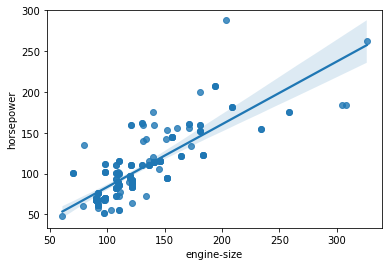

In [35]:
sns.regplot(x='engine-size', y='horsepower', data=auto,order=1)

#### Analyzing the above plot and data[Especially price, curb-weight and engine size], It seems better to impute horsepower of Mazda with 116

In [36]:
auto['horsepower'].fillna(116, inplace=True)
auto.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

### Imputing peak-rpm Column
#### RPM stands for "revolutions per minute." It's a measure of how fast the engine is spinning

In [37]:
auto[auto['peak-rpm'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,113.2,renault,gas,std,4.0,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,4,132,mpfi,3.46,3.9,8.7,116.0,NaN,23,31,9295.0
131,2,125.7,renault,gas,std,2.0,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,4,132,mpfi,3.46,3.9,8.7,116.0,NaN,23,31,9895.0


In [38]:
auto['horsepower'].unique()

array([111., 154., 102., 115., 110., 140., 160., 101., 121., 182.,  48.,
        70.,  68.,  88., 145.,  58.,  76.,  60.,  86., 100.,  78.,  90.,
       176., 262., 135.,  84.,  64., 120.,  72., 123., 155., 184., 175.,
       116.,  69.,  55.,  97., 152., 200.,  95., 142., 143., 207., 288.,
        73.,  82.,  94.,  62.,  56., 112.,  92., 161., 156.,  52.,  85.,
       114., 162., 134., 106.])

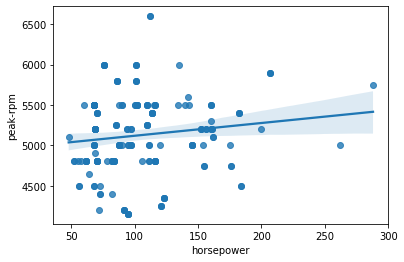

In [39]:
sns.regplot(data=auto, x='horsepower', y='peak-rpm')

#### It seems most of the cars having horsepower 100 and 120 tend to have peak rpm b/w 4800 and 5500

In [40]:
auto[auto['horsepower'].between(114,118)].sort_values(['horsepower'])

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
204,-1,95.0,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,4,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0
197,-1,74.0,volvo,gas,std,4.0,wagon,rwd,front,104.3,188.8,67.2,57.5,3042,ohc,4,141,mpfi,3.78,3.15,9.5,114.0,5400.0,24,28,16515.0
196,-2,103.0,volvo,gas,std,4.0,sedan,rwd,front,104.3,188.8,67.2,56.2,2935,ohc,4,141,mpfi,3.78,3.15,9.5,114.0,5400.0,24,28,15985.0
195,-1,74.0,volvo,gas,std,4.0,wagon,rwd,front,104.3,188.8,67.2,57.5,3034,ohc,4,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,13415.0
194,-2,103.0,volvo,gas,std,4.0,sedan,rwd,front,104.3,188.8,67.2,56.2,2912,ohc,4,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,12940.0
200,-1,95.0,volvo,gas,std,4.0,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,4,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
168,2,134.0,toyota,gas,std,2.0,hardtop,rwd,front,98.4,176.2,65.6,52.0,2536,ohc,4,146,mpfi,3.62,3.50,9.3,116.0,4800.0,24,30,9639.0
131,2,125.7,renault,gas,std,2.0,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,4,132,mpfi,3.46,3.90,8.7,116.0,NaN,23,31,9895.0
170,2,134.0,toyota,gas,std,2.0,hardtop,rwd,front,98.4,176.2,65.6,52.0,2679,ohc,4,146,mpfi,3.62,3.50,9.3,116.0,4800.0,24,30,11199.0


Text(0.5, 1.0, 'compression-ratio vs Peak-rpm')

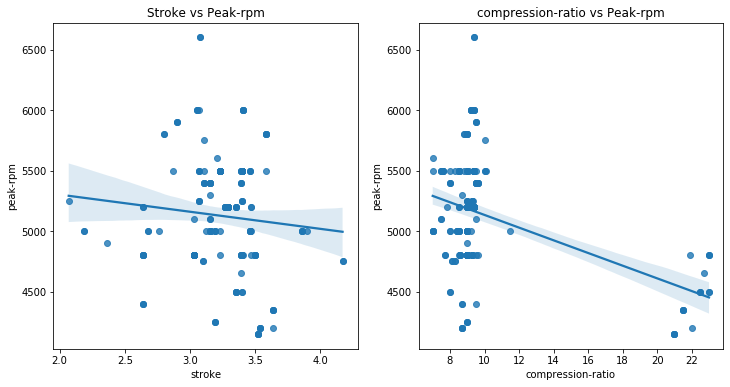

In [41]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.regplot(data=auto, x='stroke', y='peak-rpm')
plt.title('Stroke vs Peak-rpm')
plt.subplot(122)
sns.regplot(data=auto, x='compression-ratio', y='peak-rpm')
plt.title('compression-ratio vs Peak-rpm')

#### A negative correlation can be observed of Peak-rpm blw Compression ratio and Stroke

#### Analyzing cars with 116 HP
#### Cars with 9.3 compression ration tend to have 4800 rpm
#### while cars with 7.5 compression ratio tend to have 5500 rpm
### So there is a possbility for cars with same HP but compression ration 8.7 can have peak rpm about 5000

In [42]:
auto['peak-rpm'].fillna(5000, inplace=True)

### Imputing Price column

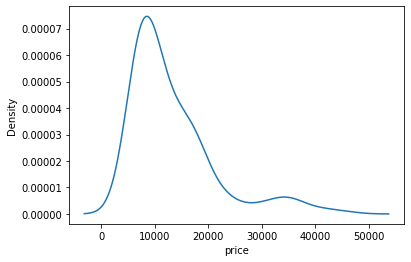

In [43]:
sns.kdeplot(auto['price'])

In [44]:
auto[auto['price'].isna()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,113.2,audi,gas,turbo,2.0,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,5,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
44,1,128.6,isuzu,gas,std,2.0,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,4,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
45,0,113.2,isuzu,gas,std,4.0,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,4,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN
129,1,128.6,porsche,gas,std,2.0,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,8,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN


#### As we know the price of a car can increase with horsepower.
#### ie, greater the horsepower of a car higher will be its price

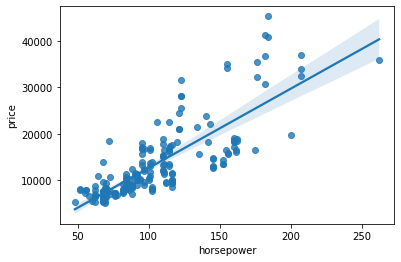

In [45]:
sns.regplot(x='horsepower', y='price', data=auto)

In [46]:
auto_audi= auto[auto['make']=='audi']
auto_isuzu= auto[auto['make']=='isuzu']
auto_porshe= auto[auto['make']=='porsche']
auto_audi_isuzu_porshe= pd.concat([auto_audi, auto_isuzu, auto_porshe], axis=0)

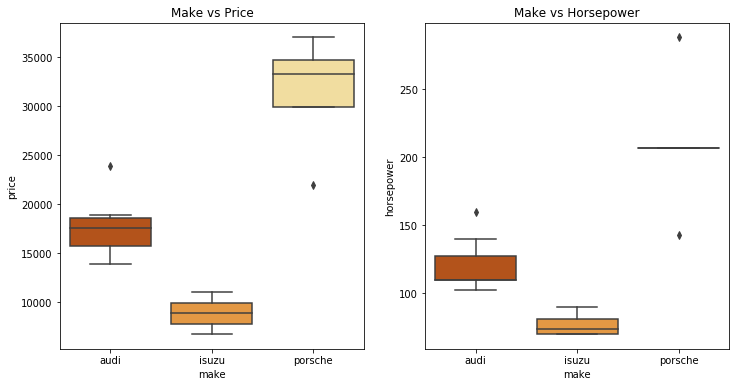

In [47]:
plt.figure(figsize=(12,6))
plt.subplot(121)
sns.boxplot(x='make', y='price', data=auto_audi_isuzu_porshe, palette='YlOrBr_r')
plt.title('Make vs Price')
plt.subplot(122)
sns.boxplot(x='make', y='horsepower', data=auto_audi_isuzu_porshe,palette='YlOrBr_r')
plt.title('Make vs Horsepower')
plt.show()

In [48]:
auto[auto['horsepower'].between(150,170)].sort_values(['horsepower'])

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
101,0,128.0,nissan,gas,std,4.0,sedan,fwd,front,100.4,181.7,66.5,55.1,3095,ohcv,6,181,mpfi,3.43,3.27,9.0,152.0,5200.0,17,22,13499.0
102,0,108.0,nissan,gas,std,4.0,wagon,fwd,front,100.4,184.6,66.5,56.1,3296,ohcv,6,181,mpfi,3.43,3.27,9.0,152.0,5200.0,17,22,14399.0
103,0,108.0,nissan,gas,std,4.0,sedan,fwd,front,100.4,184.6,66.5,55.1,3060,ohcv,6,181,mpfi,3.43,3.27,9.0,152.0,5200.0,19,25,13499.0
2,1,128.6,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
71,-1,85.6,mercedes-benz,gas,std,4.0,sedan,rwd,front,115.6,202.6,71.7,56.5,3740,ohcv,8,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,34184.0
72,3,142.0,mercedes-benz,gas,std,2.0,convertible,rwd,front,96.6,180.3,70.5,50.8,3685,ohcv,8,234,mpfi,3.46,3.10,8.3,155.0,4750.0,16,18,35056.0
181,-1,85.6,toyota,gas,std,4.0,wagon,rwd,front,104.5,187.8,66.5,54.1,3151,dohc,6,161,mpfi,3.27,3.35,9.2,156.0,5200.0,19,24,15750.0
180,-1,90.0,toyota,gas,std,4.0,sedan,rwd,front,104.5,187.8,66.5,54.1,3131,dohc,6,171,mpfi,3.27,3.35,9.2,156.0,5200.0,20,24,15690.0
137,2,104.0,saab,gas,turbo,4.0,sedan,fwd,front,99.1,186.6,66.5,56.1,2847,dohc,4,121,mpfi,3.54,3.07,9.0,160.0,5500.0,19,26,18620.0
106,1,231.0,nissan,gas,std,2.0,hatchback,rwd,front,99.2,178.5,67.9,49.7,3139,ohcv,6,181,mpfi,3.43,3.27,9.0,160.0,5200.0,19,25,18399.0


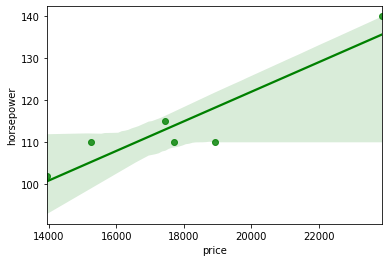

In [49]:
sns.regplot(x='price', y='horsepower', data=auto_audi, color='green')

In [50]:
auto_audi[['price','horsepower']]

,price,horsepower
3,13950.0,102.0
4,17450.0,115.0
5,15250.0,110.0
6,17710.0,110.0
7,18920.0,110.0
8,23875.0,140.0
9,NaN,160.0


##### From analysing the above data, its clear that there is solid evidence for our assumpation that
#### for every car brand,  price has a +ve trend with horsepower.
### So price of audi car with 160hp would be around 26000

In [51]:
auto_isuzu[['price','horsepower']]

,price,horsepower
43,6785.0,78.0
44,NaN,70.0
45,NaN,70.0
46,11048.0,90.0


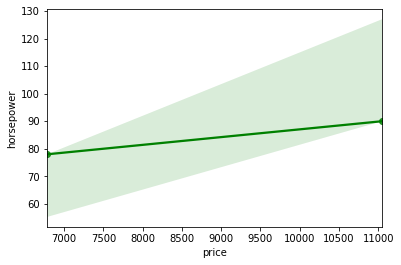

In [52]:
sns.regplot(x='price', y='horsepower', data=auto_isuzu,color='green')

### price of isuzu car with 70hp would be around 6500

In [53]:
auto_porshe[['price','horsepower']]

,price,horsepower
125,22018.0,143.0
126,32528.0,207.0
127,34028.0,207.0
128,37028.0,207.0
129,NaN,288.0


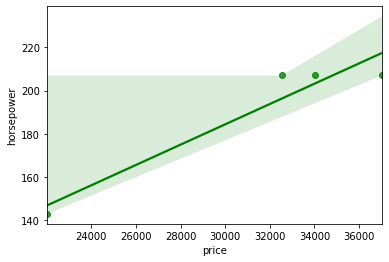

In [54]:
sns.regplot(x='price', y='horsepower', data=auto_porshe, color='green')

### price of porsche car with 288hp would be around 38000

In [55]:
def impute_price(col):
    price= col[0]
    make= col[1]
    if pd.isnull(price):
        if make=='audi':
            return 27000
        elif make=='isuzu':
            return 6500
        elif make=='porsche':
            return 37000
    else:
        return price
auto['price']= auto[['price','make']].apply(impute_price, axis=1)

In [56]:
auto.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

#### Every NaN values are imputed with appropriate values

# Checking for duplicate values

In [57]:
auto1_duplicate_chk= auto.drop(['price'], axis=1)
auto_duplicates= auto1_duplicate_chk[auto1_duplicate_chk.duplicated(keep=False)]
auto_duplicates

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,168.6,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,168.6,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
25,1,148.0,dodge,gas,std,4.0,sedan,fwd,front,93.7,157.3,63.8,50.6,1989,ohc,4,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38
26,1,148.0,dodge,gas,std,4.0,sedan,fwd,front,93.7,157.3,63.8,50.6,1989,ohc,4,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38
55,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2,70,4bbl,2.90,3.05,9.4,101.0,6000.0,17,23
56,3,150.0,mazda,gas,std,2.0,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,2,70,4bbl,2.90,3.05,9.4,101.0,6000.0,17,23
59,1,129.0,mazda,gas,std,2.0,hatchback,fwd,front,98.8,177.8,66.5,53.7,2385,ohc,4,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32
60,0,115.0,mazda,gas,std,4.0,sedan,fwd,front,98.8,177.8,66.5,55.5,2410,ohc,4,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32
61,1,129.0,mazda,gas,std,2.0,hatchback,fwd,front,98.8,177.8,66.5,53.7,2385,ohc,4,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32
62,0,115.0,mazda,gas,std,4.0,sedan,fwd,front,98.8,177.8,66.5,55.5,2410,ohc,4,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32


### Certain brands ( eg:- Mazda ) with same features have different price

In [58]:
auto= auto.drop(index=[1,26,56,61,62,116,127])
auto.reset_index(inplace=True, drop=True)
auto.shape

(198, 26)

##### -------------------------------------------------------------------

## Checking for multi-collinearity
#### We might lose reliability in determining the effects of individuals features in our Model if there is Multi-collinearity

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
X_numerical= auto.select_dtypes(include=['int64','float64'])
def calculate_vif(x):
    vif_data= pd.DataFrame()
    vif_data['features']= x.columns
    vif_data['vif']= [vif(x.values, i) for i in range(x.shape[1])]
    vif_data['vif']=vif_data['vif'].round(2)
    vif_data=vif_data.sort_values(by='vif', ascending=False)
    return vif_data
calculate_vif(X_numerical)

,features,vif
5,width,3611.45
3,wheel-base,2568.50
4,length,2053.65
6,height,1103.21
16,highway-mpg,528.34
10,bore,499.44
15,city-mpg,463.84
7,curb-weight,427.95
9,engine-size,267.11
14,peak-rpm,234.03


## Feature Engineering

#### From the above data, its clear that there are some variables with high collinearity

## Feature selection

#### Creating new columns
   ### * Engine Displacement= (bore/2)(bore/2)(pi)(stroke)(num.of cylinders)
   ### * Volume = Length * Width * Height
   ### * Bore-Stroke ratio = Bore / Stroke
   ### * Average mileage = (City mileage  + Highway mileage) / 2
   ### * Torque= 63025(hp/rpm)

In [60]:
def engine_displacement(col):
    engine_dis= col[0]
    cylinder= col[1]
    bore= col[2]
    stroke= col[3]
    if pd.isnull(engine_dis):
        if cylinder==4:
            return (bore/2)*(bore/2)*3.14*stroke*4
        elif cylinder==6:
            return (bore/2)*(bore/2)*3.14*stroke*6
        elif cylinder==5:
            return (bore/2)*(bore/2)*3.14*stroke*5
        elif cylinder==3:
            return (bore/2)*(bore/2)*3.14*stroke*3
        elif cylinder==12:
            return (bore/2)*(bore/2)*3.14*stroke*12
        elif cylinder==2:
            return (bore/2)*(bore/2)*3.14*stroke*2
        elif cylinder==8:
            return (bore/2)*(bore/2)*3.14*stroke*8
        
    else:
        return engine_dis
auto['engine-displacement']= np.NaN
auto['engine-displacement']=auto[['engine-displacement','num-of-cylinders','bore','stroke']].apply(engine_displacement, axis=1)
auto['engine-displacement']=auto['engine-displacement'].round(2)

In [61]:
auto['volume']= auto['length'] *auto['width'] *auto['height']
auto['volume']= auto['volume'].round(2)
auto['average mileage']= (auto['highway-mpg'] + auto['city-mpg'])/2
auto['average mileage']= auto['average mileage'].round(2)
auto['torque']= (63025*auto['horsepower'])/auto['peak-rpm']
auto['torque']=auto['torque'].round(2)
auto1= auto.drop(['length','width', 'height', 'bore','stroke', 'city-mpg', 'highway-mpg','horsepower','peak-rpm','num-of-cylinders'],axis=1)

In [62]:
auto1.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,curb-weight,engine-type,engine-size,fuel-system,compression-ratio,price,engine-displacement,volume,average mileage,torque
0,3,168.6,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,2548,dohc,130,mpfi,9.0,13495.0,101.33,528019.90,24.0,1399.16
1,1,128.6,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,2823,ohcv,152,mpfi,9.0,16500.0,117.39,587592.64,22.5,1941.17
2,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,2337,ohc,109,mpfi,10.0,13950.0,108.64,634816.96,27.0,1168.83
3,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,2824,ohc,136,mpfi,8.0,17450.0,135.80,636734.83,20.0,1317.80
4,2,125.7,audi,gas,std,2.0,sedan,fwd,front,99.8,2507,ohc,136,mpfi,8.5,15250.0,135.80,624189.97,22.0,1260.50
5,1,158.0,audi,gas,std,4.0,sedan,fwd,front,105.8,2844,ohc,136,mpfi,8.5,17710.0,135.80,766364.05,22.0,1260.50
6,1,128.6,audi,gas,std,4.0,wagon,fwd,front,105.8,2954,ohc,136,mpfi,8.5,18920.0,135.80,766364.05,22.0,1260.50
7,1,158.0,audi,gas,turbo,4.0,sedan,fwd,front,105.8,3086,ohc,131,mpfi,8.3,23875.0,130.74,769115.80,18.5,1604.27
8,0,113.2,audi,gas,turbo,2.0,hatchback,4wd,front,99.5,3053,ohc,131,mpfi,7.0,27000.0,130.74,629188.56,19.0,1833.45
9,2,192.0,bmw,gas,std,2.0,sedan,rwd,front,101.2,2395,ohc,108,mpfi,8.8,16430.0,107.70,622095.55,26.0,1097.50


In [63]:
auto1[['engine-displacement','engine-size']].corr()

,engine-displacement,engine-size
engine-displacement,1.000000,0.967612
engine-size,0.967612,1.000000


### Engine size is approximately same as Engine displacement. This is clear from the above data.
### So it is better to drop either of them.

In [64]:
auto1= auto1.drop(['engine-size'], axis=1)

In [65]:
calculate_vif(auto1.select_dtypes(include=['int64','float64']))

,features,vif
3,wheel-base,870.59
8,volume,531.68
4,curb-weight,376.15
9,average mileage,84.42
10,torque,68.76
7,engine-displacement,52.63
1,normalized-losses,25.46
2,num-of-doors,23.23
6,price,18.37
5,compression-ratio,14.31


(11.0, 0.0)

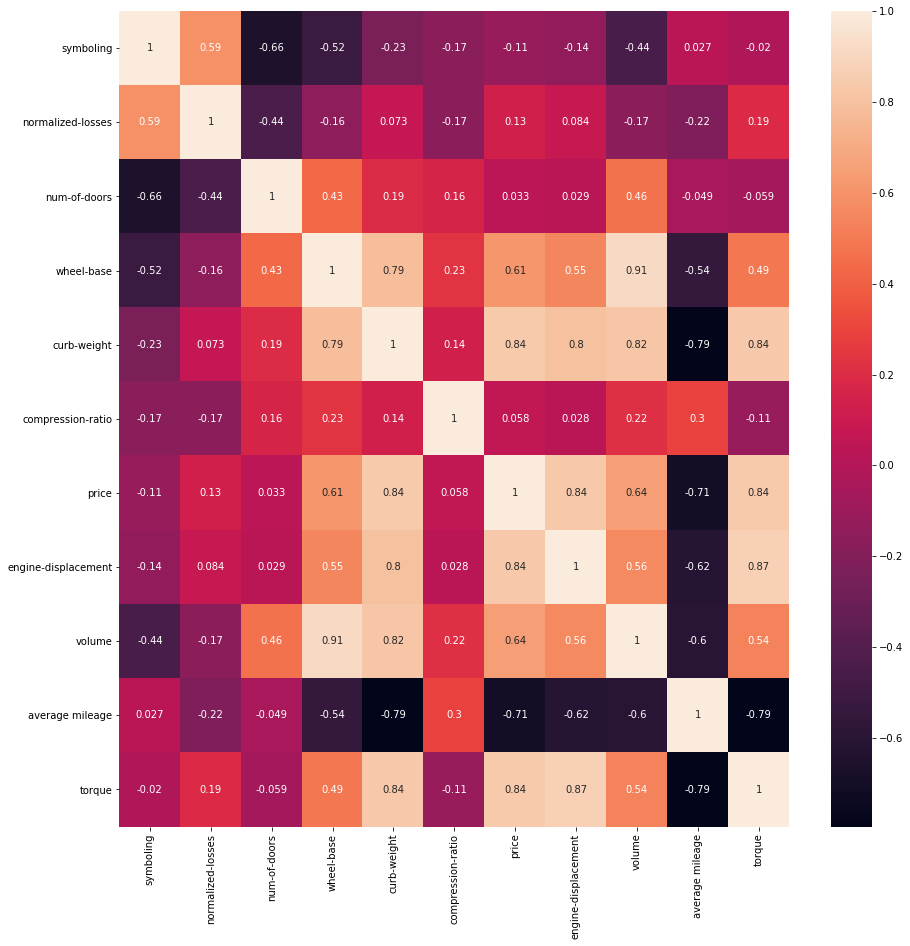

In [66]:
plt.figure(figsize=(15,15))
ax= sns.heatmap(auto1.corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### To understand how price of a car changes w.r.t different class of different catogerical features

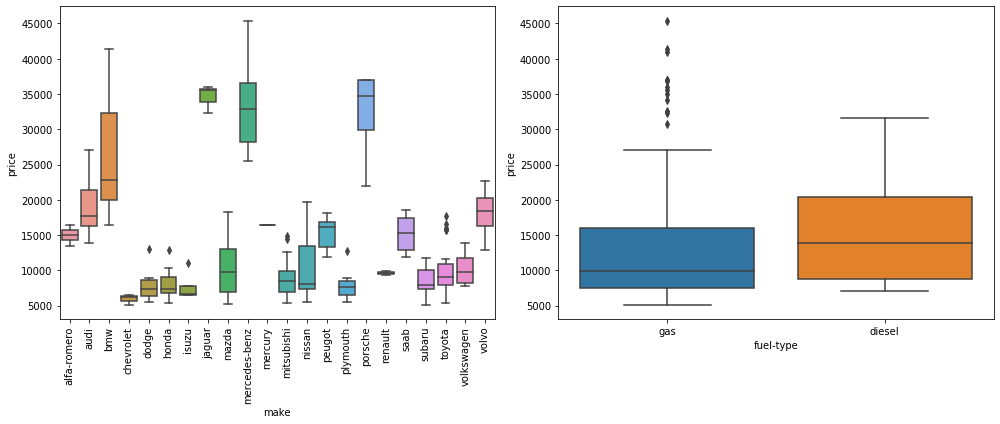

In [67]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(x='make',y='price', data=auto1)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(x='fuel-type',y='price', data=auto1)
plt.tight_layout()

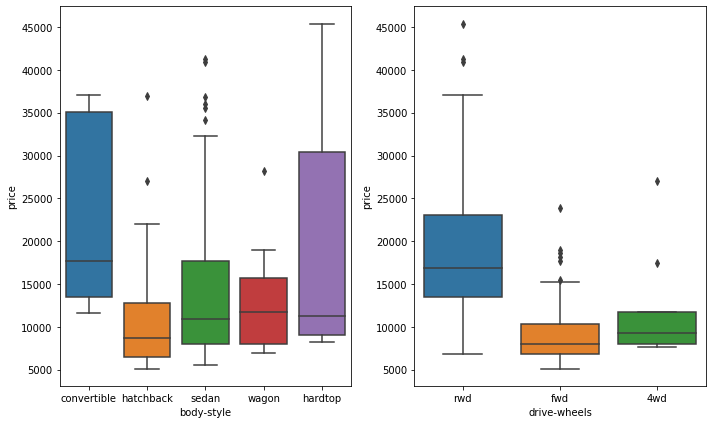

In [68]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(x='body-style',y='price', data=auto1)
plt.subplot(1,2,2)
sns.boxplot(x='drive-wheels',y='price', data=auto1)
plt.tight_layout()

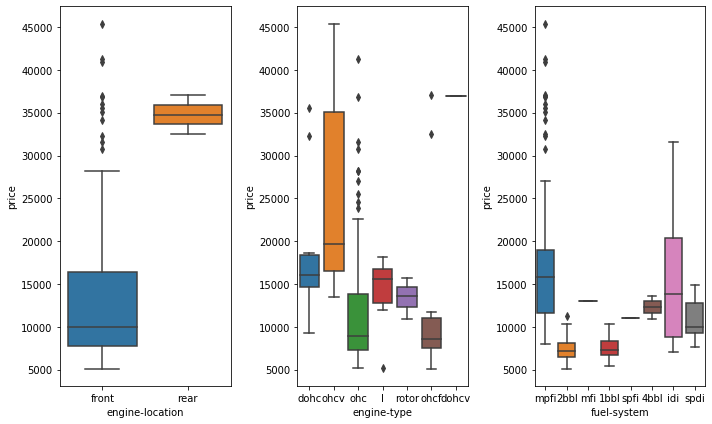

In [69]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
sns.boxplot(x='engine-location',y='price', data=auto1)
plt.subplot(1,3,2)
sns.boxplot(x='engine-type',y='price', data=auto1)
plt.subplot(1,3,3)
sns.boxplot(x='fuel-system',y='price', data=auto1)
plt.tight_layout()

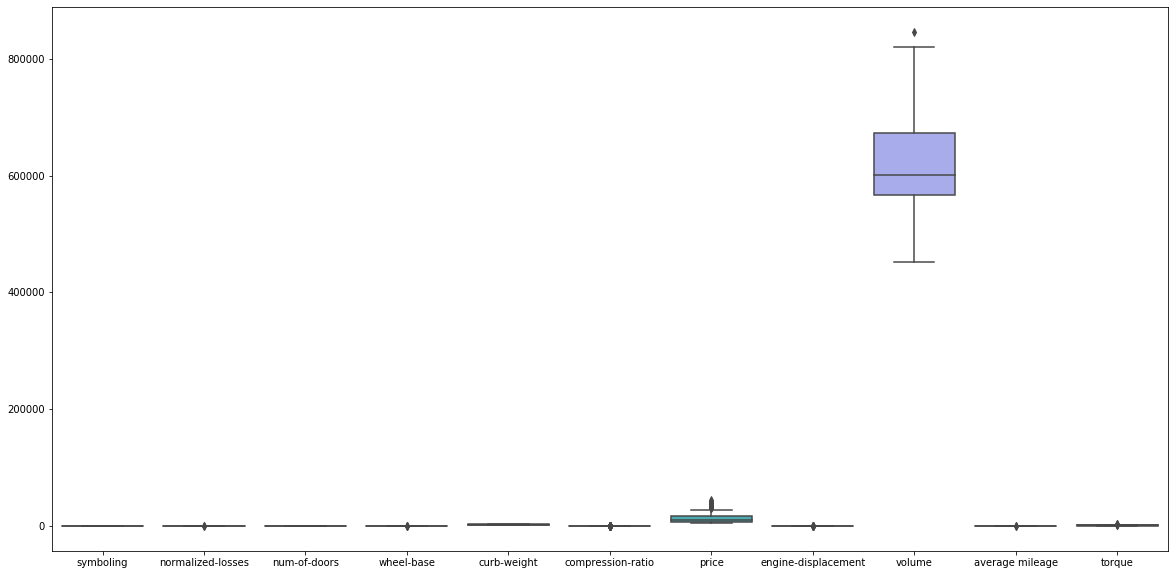

In [70]:
plt.figure(figsize=(20,10))
auto1_num= auto1.select_dtypes(include=['int64','float64'])
sns.boxplot(data=auto1)

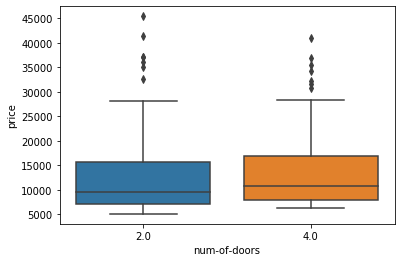

In [71]:
sns.boxplot(data=auto1, x='num-of-doors', y='price')

Price has right skewness


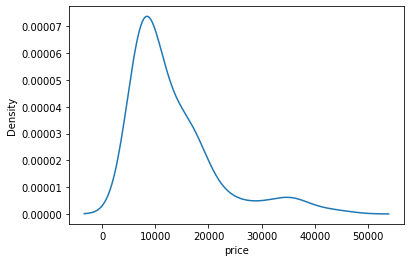

In [72]:
sns.kdeplot(auto1['price'])
print('Price has right skewness')

##### Price has right skewness

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

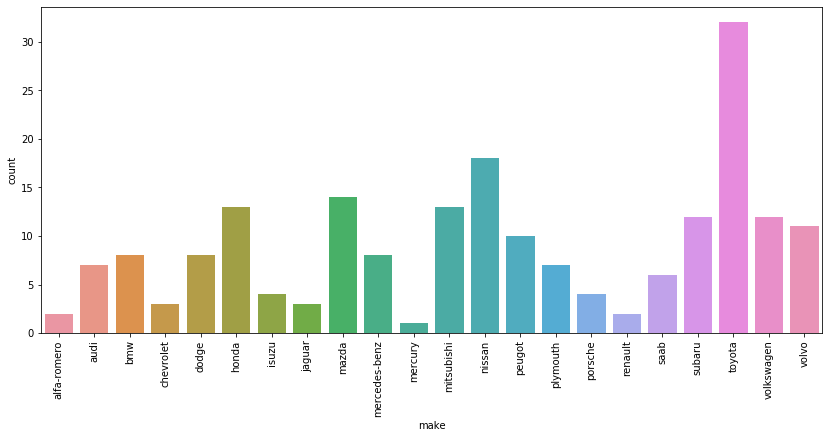

In [73]:
plt.figure(figsize=(14,6))
sns.countplot(auto1['make'])
plt.xticks(rotation=90)

### Encoding Categorical features

In [74]:
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()
auto1['num-of-doors']= lb.fit_transform(auto1['num-of-doors'])
#auto1['symboling']= lb.fit_transform(auto1['symboling'])
#auto1['make']= lb.fit_transform(auto1['make'])
#auto1['fuel-type']= lb.fit_transform(auto1['fuel-type'])
#auto1['aspiration']= lb.fit_transform(auto1['aspiration'])
#auto1['body-style']= lb.fit_transform(auto1['body-style'])
#auto1['drive-wheels']= lb.fit_transform(auto1['drive-wheels'])
#auto1['engine-location']= lb.fit_transform(auto1['engine-location'])
#auto1['fuel-system']= lb.fit_transform(auto1['fuel-system'])
#auto1['engine-type']= lb.fit_transform(auto1['engine-type'])
auto1_encoded= pd.get_dummies(auto1, drop_first=True)
auto1_encoded.head()

,symboling,normalized-losses,num-of-doors,wheel-base,curb-weight,compression-ratio,price,engine-displacement,volume,average mileage,torque,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_gas,aspiration_turbo,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd,engine-location_rear,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,168.6,0,88.6,2548,9.0,13495.0,101.33,528019.90,24.0,1399.16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,128.6,0,94.5,2823,9.0,16500.0,117.39,587592.64,22.5,1941.17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,2,164.0,1,99.8,2337,10.0,13950.0,108.64,634816.96,27.0,1168.83,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2,164.0,1,99.4,2824,8.0,17450.0,135.80,636734.83,20.0,1317.80,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,2,125.7,0,99.8,2507,8.5,15250.0,135.80,624189.97,22.0,1260.50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


### Normalisation of data

In [75]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler,StandardScaler
minmax_scaler= MinMaxScaler()
std_scaler=StandardScaler() 
rb_scaler= RobustScaler()
#normalised with robust scaler
auto1_encoded_scaled= pd.DataFrame(rb_scaler.fit_transform(auto1_encoded))
auto1_encoded_scaled.columns= auto1_encoded.columns
#normalised with scale
auto1_encoded_norm= pd.DataFrame(std_scaler.fit_transform(auto1_encoded))
auto1_encoded_norm.columns= auto1_encoded.columns
#normalised with minmax scaler
auto1_encoded_min_max= pd.DataFrame(minmax_scaler.fit_transform(auto1_encoded))
auto1_encoded_min_max.columns=auto1_encoded.columns

### Machine Learning

In [76]:
X=auto1_encoded_scaled.drop(['price'], axis=1)
y=auto1_encoded_scaled.price

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)
print('no.of training data:', X_train.shape[0])
print('no.of testing data:', X_test.shape[0])

no.of training data: 158
no.of testing data: 40


In [78]:
#def get_score(model, X_train, X_test, y_train, y_test):
    #model.fit(X_train, y_train)
    #y_pred= model.predict(X_test)
    #mae= mean_absolute_error(y_pred, y_test)
    #mse= mean_squared_error(y_pred, y_test)
    #print('mae:', mae)
    #print('mse:', mse)
    #return model.score(X_test, y_test)

In [79]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
linear_regression= LinearRegression()
lasso_regression= Lasso(alpha=0.0008)
ridge_regression= Ridge(alpha=0.01)
decision_tree_regression= DecisionTreeRegressor()
randomforest_regressor=RandomForestRegressor()
models= [linear_regression, lasso_regression, ridge_regression, decision_tree_regression, randomforest_regressor]

In [ ]:
def model_accuracy(models):
    model_name= []
    MAE=[]
    MSE=[]
    r2score=[]
    for model in models:
        model.fit(X_train, y_train)
        y_pred= model.predict(X_test)
        modelname= model
        mae= mean_absolute_error(y_test, y_pred)
        mse= mean_squared_error(y_test, y_pred)
        r2scores= r2_score(y_test, y_pred)
        model_name.append(model)
        MAE.append(mae)
        MSE.append(mse)
        r2score.append(r2scores)
    return model_name, MAE, MSE, r2score

In [ ]:
model_dataframe= pd.DataFrame(model_accuracy(models)).T
model_dataframe.columns= ['model name', 'mae', 'mse', 'r2score']
model_dataframe['model name']= ['linear_regression', 'lasso_regression', 'ridge_regression','decision_tree_regression', 'randomforest_regressor']

In [ ]:
plt.figure(figsize=(14,9))
predictors= X_train.columns
coef= pd.Series(ridge_regression.coef_, predictors).sort_values()
coef.plot(kind='bar', title='Lasso regression coefficients')

In [ ]:
plt.figure(figsize=(14,9))
predictors= X_train.columns
coef= pd.Series(lasso_regression.coef_, predictors).sort_values()
coef.plot(kind='bar', title='Lasso regression coefficients')

In [ ]:
model_dataframe

### 1) Random forest regression works better than all other alogorithms
### 2) Among linear regressors Lasso works better because it selects some features while shrinking coefficients of others to zero
### 3) Normalization with Robust scaler works better since data has some outliers. Robust scaler uses interquartile range. so it will be robust to outliers

### ---------------------------------------------------------------------------------------------------

## Performing Linear Regression Using Statsmodel

In [ ]:
import statsmodels.api as sm
model= sm.OLS(y,X).fit()
model_details= model.summary()
print(model_details)

### ------------------------------------------------------------------------------------------------------